In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix

In [3]:
data = pd.read_csv('https://storage.googleapis.com/mledu-datasets/cars_data.csv')

In [45]:
pd.options.display.max_columns = 30

In [19]:
backup_0 = data.copy() # Filled, Permutated

In [48]:
backup_1 = data.copy() # Feature Crossed, size = width*length

In [51]:
backup_2 = data.copy() # Width & Length Attributes Droped

In [5]:
features = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'height', 'weight',
        'engine-type', 'num-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']

label = ['price']

categorical_features = ['make', 'fuel-type', 'aspiration', 'num-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-cylinders', 'fuel-system']

num_features = list(set(features) - set(categorical_features))

null_features = ['bore', 'price', 'stroke', 'normalized-losses', 'horsepower', 'peak-rpm']

In [6]:
len(features) == len(categorical_features) + len(num_features)

True

In [7]:
data.columns = features

In [9]:
# Force none-number numerics to NaN
for feature_name in num_features + label:
    data[feature_name] = pd.to_numeric(data[feature_name], errors='coerce')

In [10]:
data[num_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   width              204 non-null    float64
 2   length             204 non-null    float64
 3   weight             204 non-null    int64  
 4   price              200 non-null    float64
 5   city-mpg           204 non-null    int64  
 6   engine-size        204 non-null    int64  
 7   horsepower         202 non-null    float64
 8   stroke             200 non-null    float64
 9   height             204 non-null    float64
 10  peak-rpm           202 non-null    float64
 11  compression-ratio  204 non-null    float64
 12  normalized-losses  164 non-null    float64
 13  highway-mpg        204 non-null    int64  
 14  bore               200 non-null    float64
 15  wheel-base         204 non-null    float64
dtypes: float64(11), int64(5)
m

In [11]:
# Fill NaN Values With Mean
imputer = SimpleImputer(strategy='mean')
imputer.fit(data[num_features])
X = imputer.transform(data[num_features])

In [14]:
num_data = pd.DataFrame(X, columns=num_features)

In [15]:
cat_data = data[categorical_features]

In [16]:
data = pd.concat([num_data, cat_data], axis=1)

In [17]:
data = data.reindex(np.random.permutation(data.index))

In [47]:
correlations = data.corr()
correlations['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.861753
weight               0.820831
horsepower           0.757943
width                0.730130
size                 0.729362
length               0.683372
wheel-base           0.587607
bore                 0.532562
height               0.136123
normalized-losses    0.133999
stroke               0.083115
compression-ratio    0.071058
symboling           -0.083136
peak-rpm            -0.100833
city-mpg            -0.668021
highway-mpg         -0.690937
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7866F1F70>,
      dtype=object)

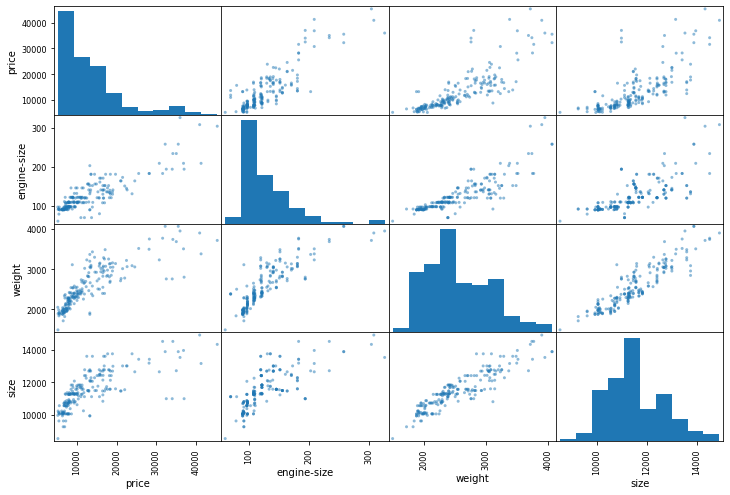

In [54]:
attributes = ['price', 'engine-size', 'weight', 'size']
scatter_matrix(data[attributes], figsize=(12,8))

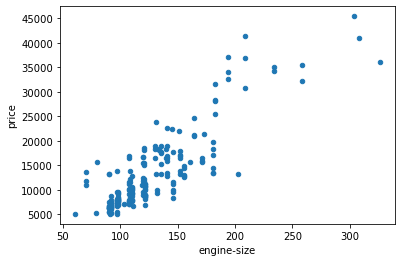

In [32]:
data.plot(kind='scatter', x='engine-size', y='price', alpha=1)

In [36]:
data

,symboling,width,length,weight,price,city-mpg,engine-size,horsepower,stroke,height,peak-rpm,compression-ratio,normalized-losses,highway-mpg,bore,wheel-base,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,engine-type,num-cylinders,fuel-system
49,1.0,64.2,159.1,1890.0,5195.0,30.0,91.0,68.0,3.15,54.1,5000.0,9.0,104.0,31.0,3.03,93.1,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
100,0.0,66.5,181.7,3095.0,13499.0,17.0,181.0,152.0,3.27,55.1,5200.0,9.0,128.0,22.0,3.43,100.4,nissan,gas,std,four,sedan,fwd,front,ohcv,six,mpfi
31,1.0,64.0,150.0,1837.0,5399.0,38.0,79.0,60.0,3.07,52.6,5500.0,10.1,101.0,42.0,2.91,93.7,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
154,0.0,63.6,169.7,3110.0,8778.0,27.0,92.0,62.0,3.03,59.1,4800.0,9.0,91.0,32.0,3.05,95.7,toyota,gas,std,four,wagon,4wd,front,ohc,four,2bbl
74,1.0,68.0,178.4,2910.0,16503.0,19.0,140.0,175.0,3.12,54.8,5000.0,8.0,122.0,24.0,3.78,102.7,mercury,gas,turbo,two,hatchback,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.0,69.6,199.6,4066.0,35550.0,15.0,258.0,176.0,4.17,52.8,4750.0,8.1,122.0,19.0,3.63,113.0,jaguar,gas,std,four,sedan,rwd,front,dohc,six,mpfi
107,0.0,68.4,186.7,3197.0,13200.0,28.0,152.0,95.0,3.52,56.7,4150.0,21.0,161.0,33.0,3.70,107.9,peugot,diesel,turbo,four,sedan,rwd,front,l,four,idi
170,2.0,65.6,176.2,2714.0,11549.0,24.0,146.0,116.0,3.50,52.0,4800.0,9.3,134.0,30.0,3.62,98.4,toyota,gas,std,two,hatchback,rwd,front,ohc,four,mpfi
53,1.0,64.2,166.8,1950.0,7395.0,31.0,91.0,68.0,3.15,54.1,5000.0,9.0,113.0,38.0,3.08,93.1,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl


In [42]:
data['size'] = data['width']*data['length']

In [43]:
data = data[['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width', 'size', 'height', 'weight',
        'engine-type', 'num-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']]

In [49]:
data = data.drop(columns=['width', 'length'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78B1D9790>,
      dtype=object)

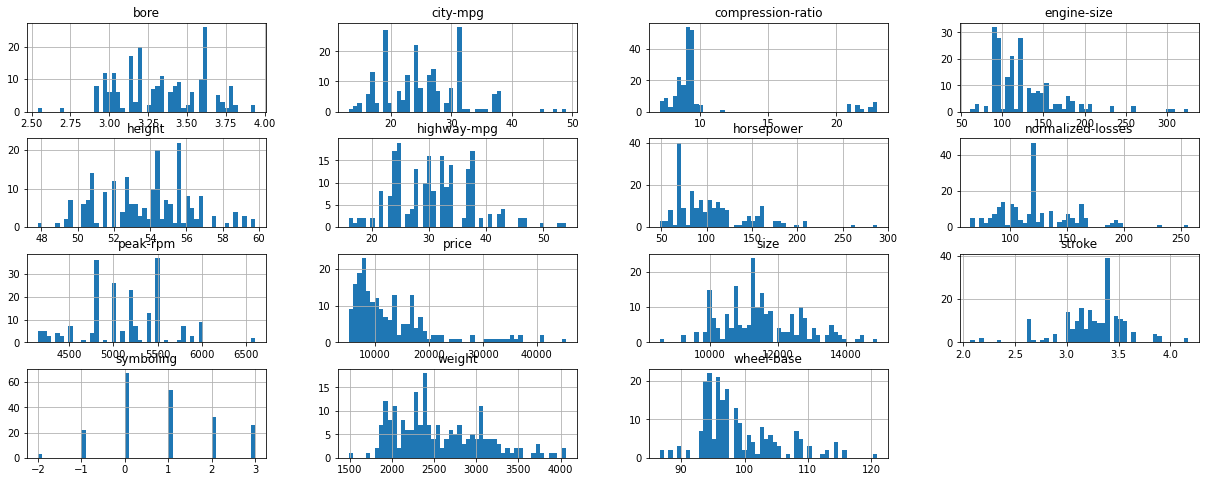

In [61]:
data.hist(bins=50, figsize=(21,8))